In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
import numpy as np
import math
warnings.filterwarnings('ignore')

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 400)

## Data loading and Analysis
We load the data and do the primary analysis of data

In [2]:
# read the data into dataframe
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# get the data shape
data.shape

(1460, 81)

In [4]:
# get the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# data description
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# make Id as index column
data.set_index('Id', inplace=True)

### Deriving New Metrics

In [7]:
# converting years to age at sold by subtracting YearBuilt, YearRemodAdd, GarageYrBlt from YrSold
data['AgeYearBuilt'] = data['YrSold'] - data['YearBuilt']
data['AgeYearRemodAdd'] = data['YrSold'] - data['YearRemodAdd']
data['AgeGarageYrBlt'] = data['YrSold'] - data['GarageYrBlt']

# drop earlier actual year columns
data.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)
data 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,WD,Normal,208500,5,5,5.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,WD,Normal,181500,31,31,31.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,WD,Normal,223500,7,6,7.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,WD,Abnorml,140000,91,36,8.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,WD,Normal,250000,8,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,WD,Normal,175000,8,7,8.0
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,WD,Normal,210000,32,22,32.0
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,WD,Normal,266500,69,4,69.0


In [8]:
# remove duplicates
data.drop_duplicates(inplace=True)

## Missing values handling

In [9]:
# analyze the missing the values
missing_summary = round((data.isnull().sum()/data.shape[0])*100, 1)
missing_summary.sort_values(ascending=False)

PoolQC             99.5
MiscFeature        96.3
Alley              93.8
Fence              80.8
FireplaceQu        47.3
LotFrontage        17.7
AgeGarageYrBlt      5.5
GarageType          5.5
GarageFinish        5.5
GarageQual          5.5
GarageCond          5.5
BsmtFinType2        2.6
BsmtExposure        2.6
BsmtFinType1        2.5
BsmtCond            2.5
BsmtQual            2.5
MasVnrType          0.5
MasVnrArea          0.5
Electrical          0.1
RoofMatl            0.0
Exterior1st         0.0
TotRmsAbvGrd        0.0
Functional          0.0
Fireplaces          0.0
Neighborhood        0.0
LandSlope           0.0
LotConfig           0.0
GarageCars          0.0
GarageArea          0.0
Utilities           0.0
LandContour         0.0
PavedDrive          0.0
WoodDeckSF          0.0
OpenPorchSF         0.0
EnclosedPorch       0.0
3SsnPorch           0.0
ScreenPorch         0.0
PoolArea            0.0
LotShape            0.0
Street              0.0
LotArea             0.0
MiscVal         

In [10]:
# drop the columns which are having more than 40%
drop_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
data.drop(drop_columns, axis=1, inplace=True)

In [11]:
# get the missing the values data types
data[['LotFrontage','AgeGarageYrBlt', 'GarageCond', 'GarageType', 'GarageQual', 'GarageFinish', 
'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
'MasVnrArea', 'MasVnrType', 'Electrical']].dtypes


LotFrontage       float64
AgeGarageYrBlt    float64
GarageCond         object
GarageType         object
GarageQual         object
GarageFinish       object
BsmtFinType2       object
BsmtExposure       object
BsmtQual           object
BsmtCond           object
BsmtFinType1       object
MasVnrArea        float64
MasVnrType         object
Electrical         object
dtype: object

In [12]:
# fill numeric missing values with median
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['AgeGarageYrBlt'] = data['AgeGarageYrBlt'].fillna(data['AgeGarageYrBlt'].median())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())

# fill categorical(string) values with mode
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# get the missing values summary after fill
missing_summary = round((data.isnull().sum()/data.shape[0])*100, 1)
missing_summary.sort_values(ascending=False)

MSSubClass         0.0
GarageCars         0.0
GarageType         0.0
Fireplaces         0.0
Functional         0.0
TotRmsAbvGrd       0.0
KitchenQual        0.0
KitchenAbvGr       0.0
BedroomAbvGr       0.0
HalfBath           0.0
FullBath           0.0
BsmtHalfBath       0.0
BsmtFullBath       0.0
GrLivArea          0.0
LowQualFinSF       0.0
2ndFlrSF           0.0
1stFlrSF           0.0
GarageFinish       0.0
GarageArea         0.0
MSZoning           0.0
GarageQual         0.0
AgeYearRemodAdd    0.0
AgeYearBuilt       0.0
SalePrice          0.0
SaleCondition      0.0
SaleType           0.0
MoSold             0.0
MiscVal            0.0
PoolArea           0.0
ScreenPorch        0.0
3SsnPorch          0.0
EnclosedPorch      0.0
OpenPorchSF        0.0
WoodDeckSF         0.0
PavedDrive         0.0
GarageCond         0.0
Electrical         0.0
CentralAir         0.0
HeatingQC          0.0
Heating            0.0
OverallCond        0.0
OverallQual        0.0
HouseStyle         0.0
BldgType   

## Segregate Categorical Features and Numerical Features

In [13]:
# get featurename and datatype
[(col, data[col].dtype) for col in data.columns]

[('MSSubClass', dtype('int64')),
 ('MSZoning', dtype('O')),
 ('LotFrontage', dtype('float64')),
 ('LotArea', dtype('int64')),
 ('Street', dtype('O')),
 ('LotShape', dtype('O')),
 ('LandContour', dtype('O')),
 ('Utilities', dtype('O')),
 ('LotConfig', dtype('O')),
 ('LandSlope', dtype('O')),
 ('Neighborhood', dtype('O')),
 ('Condition1', dtype('O')),
 ('Condition2', dtype('O')),
 ('BldgType', dtype('O')),
 ('HouseStyle', dtype('O')),
 ('OverallQual', dtype('int64')),
 ('OverallCond', dtype('int64')),
 ('RoofStyle', dtype('O')),
 ('RoofMatl', dtype('O')),
 ('Exterior1st', dtype('O')),
 ('Exterior2nd', dtype('O')),
 ('MasVnrType', dtype('O')),
 ('MasVnrArea', dtype('float64')),
 ('ExterQual', dtype('O')),
 ('ExterCond', dtype('O')),
 ('Foundation', dtype('O')),
 ('BsmtQual', dtype('O')),
 ('BsmtCond', dtype('O')),
 ('BsmtExposure', dtype('O')),
 ('BsmtFinType1', dtype('O')),
 ('BsmtFinSF1', dtype('int64')),
 ('BsmtFinType2', dtype('O')),
 ('BsmtFinSF2', dtype('int64')),
 ('BsmtUnfSF', dty

In [14]:
# get numerical features
numerical_features = [col for col in data.columns if data[col].dtype=='int64' or data[col].dtype=='float64']

# get categorical features
categorical_features = [col for col in data.columns if data[col].dtype=='O']


## Exploratory Data Analysis

### Outlier Detection

In [15]:
len(numerical_features)

36

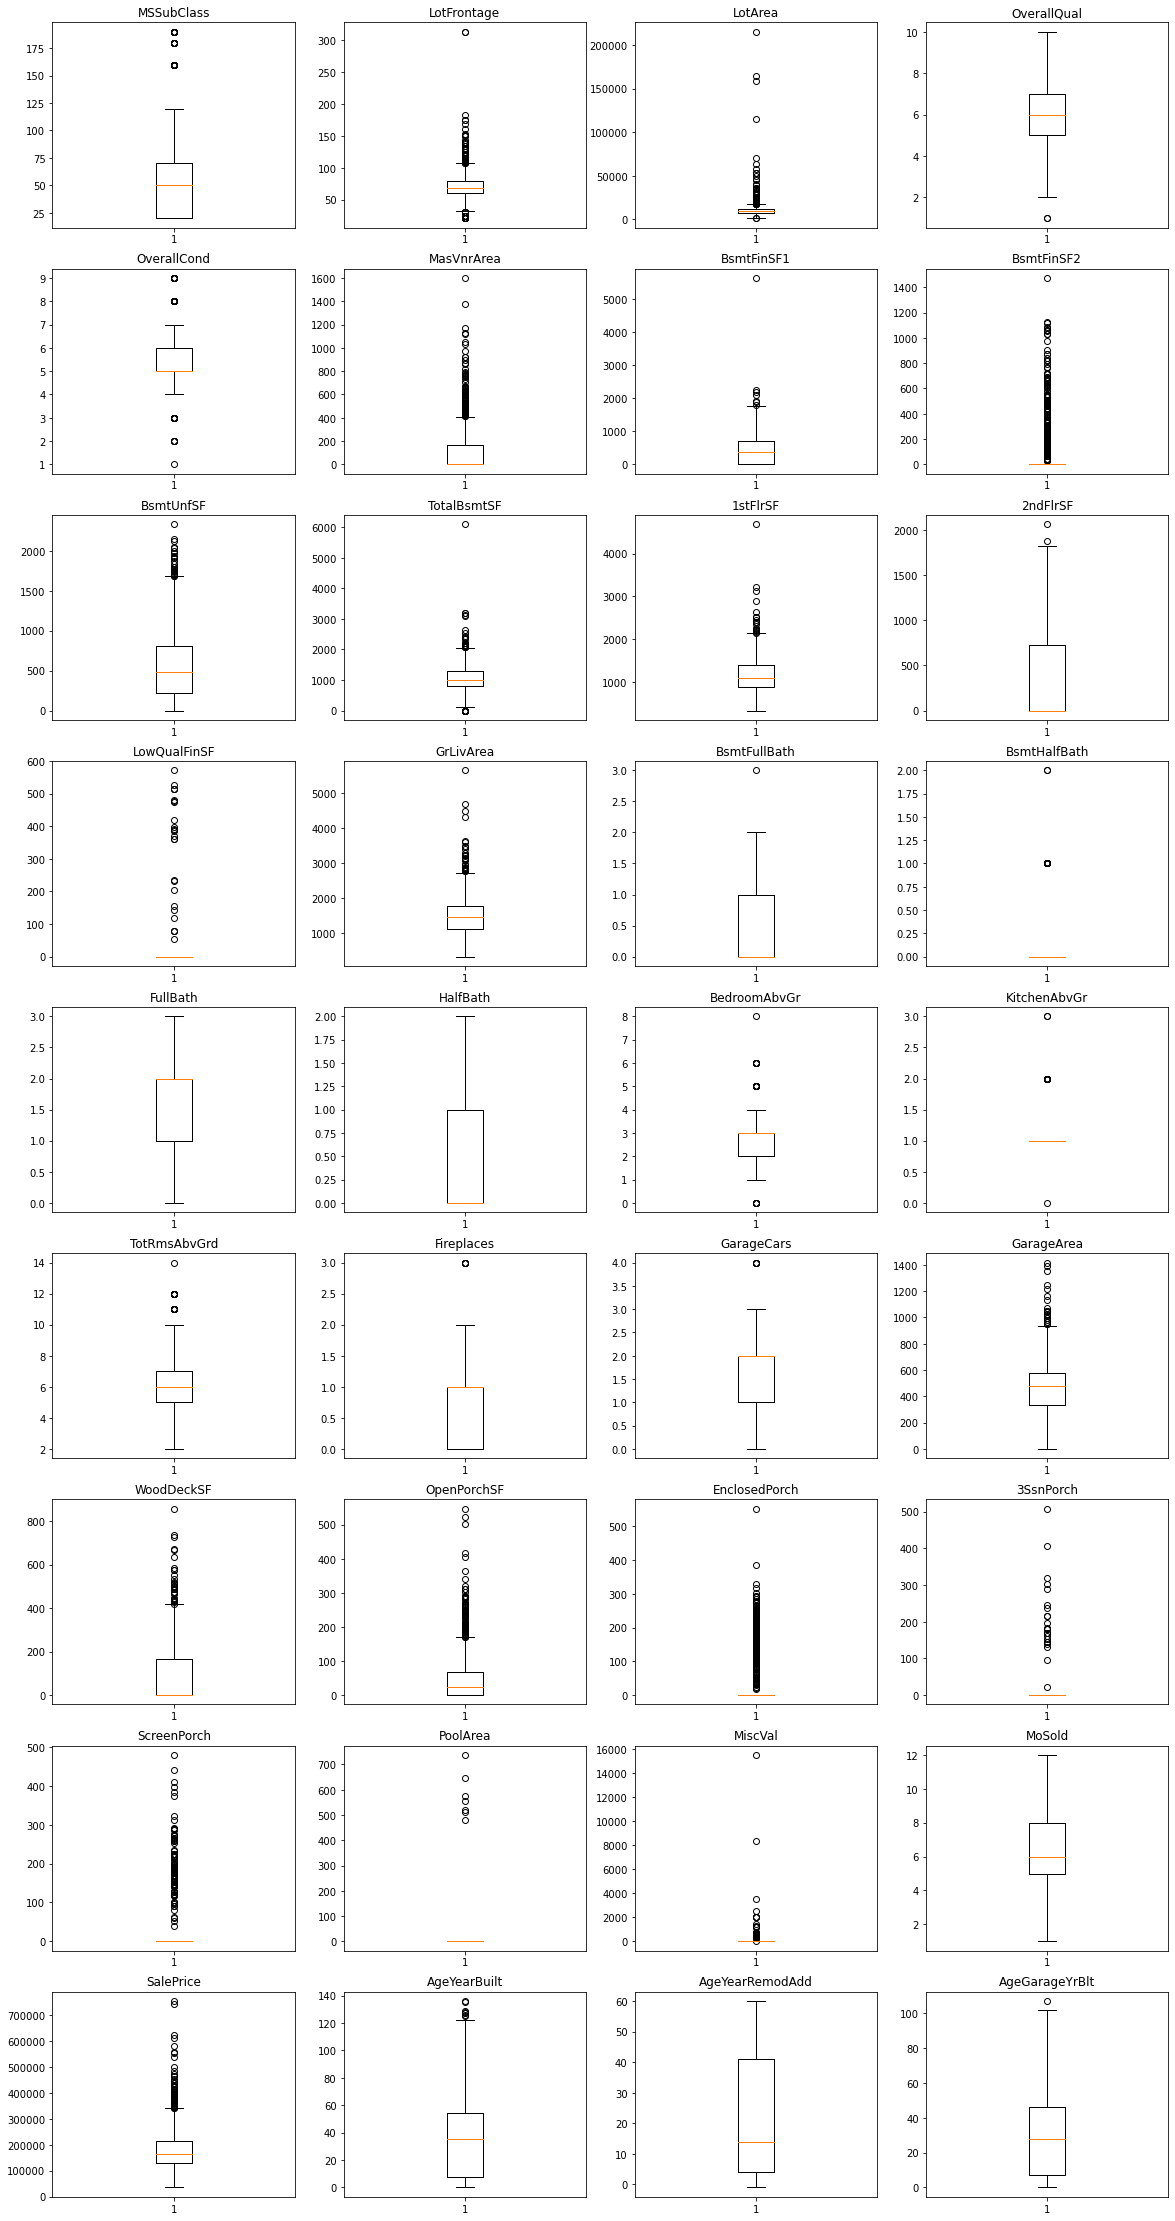

In [16]:
fig = plt.figure(figsize=(20,40))
plot_count = 0
for i in range(1, 37):
    plot_count = plot_count + 1
    ax = fig.add_subplot(9, 4, plot_count)
    ax.set_title(numerical_features[i-1])
    ax.boxplot(data[numerical_features[i-1]])
        

As per above Boxplot, Numerical Features are having more outliers. So we will drop the outliers data.

Before handling the outliers, we will copy data into temporary data frame 'data_copy'. Then perform actions on 'data_copy'.

In [17]:
data_copy = data.copy()

for col in numerical_features:
    q25 = data_copy[col].quantile(0.25)
    q75 = data_copy[col].quantile(0.75)
    iqr = q75 - q25
    upper_limit = q75 + 1.5*iqr
    lower_limit = q25 - 1.5*iqr
    data_copy = data_copy[(data_copy[col]>=lower_limit) & (data_copy[col]<= upper_limit)]
    
data_copy.shape

(546, 74)

If we remove outliers based on Inter Quantile Range, we are loosing more than 60% of data. So we will not remove the outliers.

## Count plots for Categorical Features

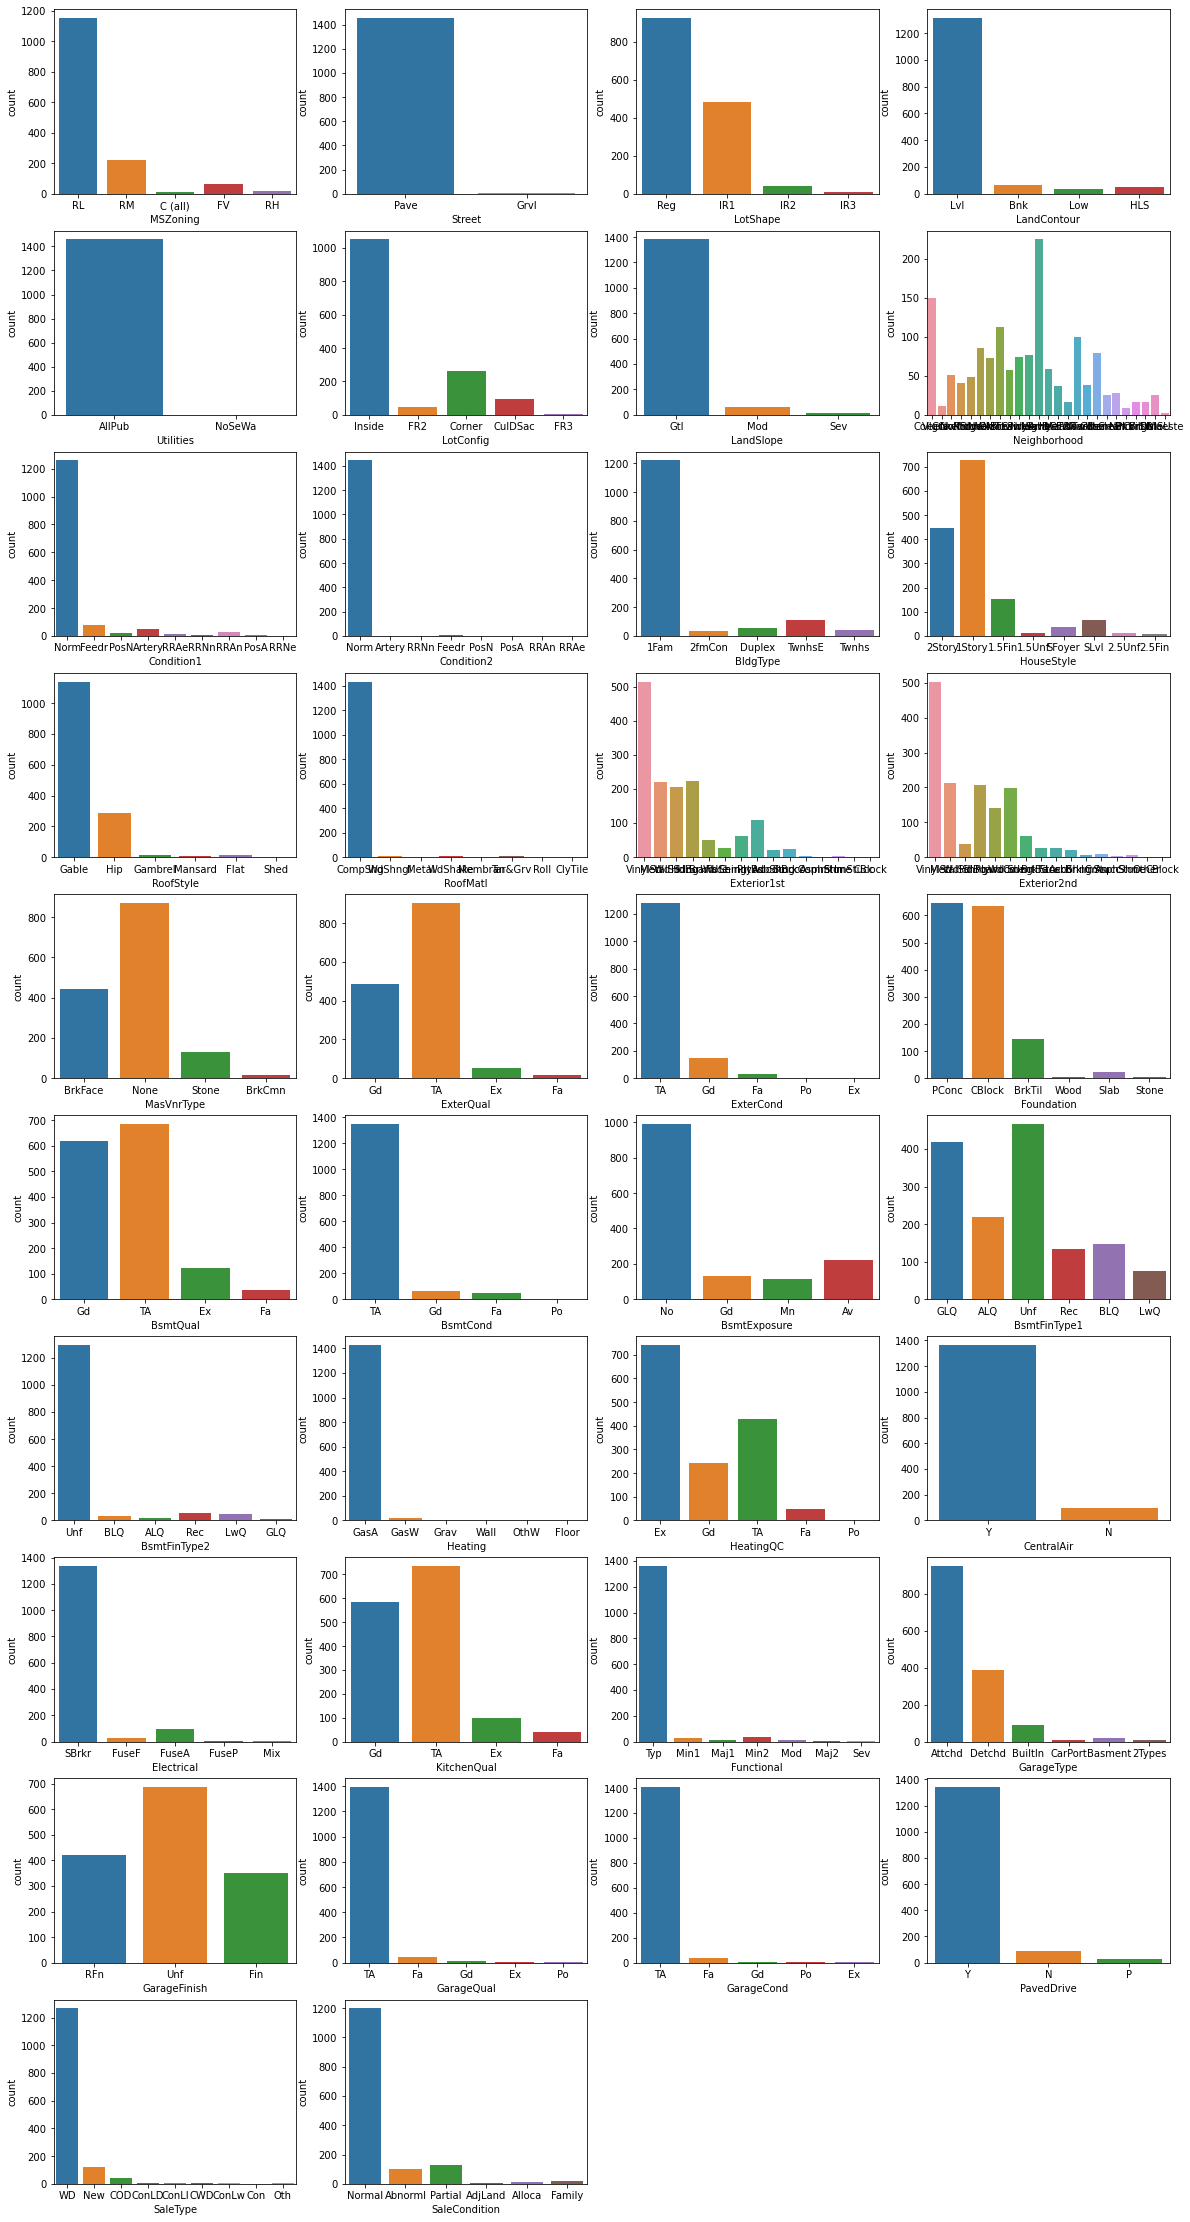

In [18]:
fig = plt.figure(figsize=(20,40))
plot_count = 0
for i in range(1, 39):
    plot_count = plot_count + 1
    ax = fig.add_subplot(10, 4, plot_count)
#     ax.set_title(categorical_features[i-1]) 
    sns.countplot(data[categorical_features[i-1]])

As per above Count Plots, few Categorical Features are having dominant values which are more in Quanity. 

## Handling MultiCollinearity Problem for Numerical Features

<AxesSubplot:>

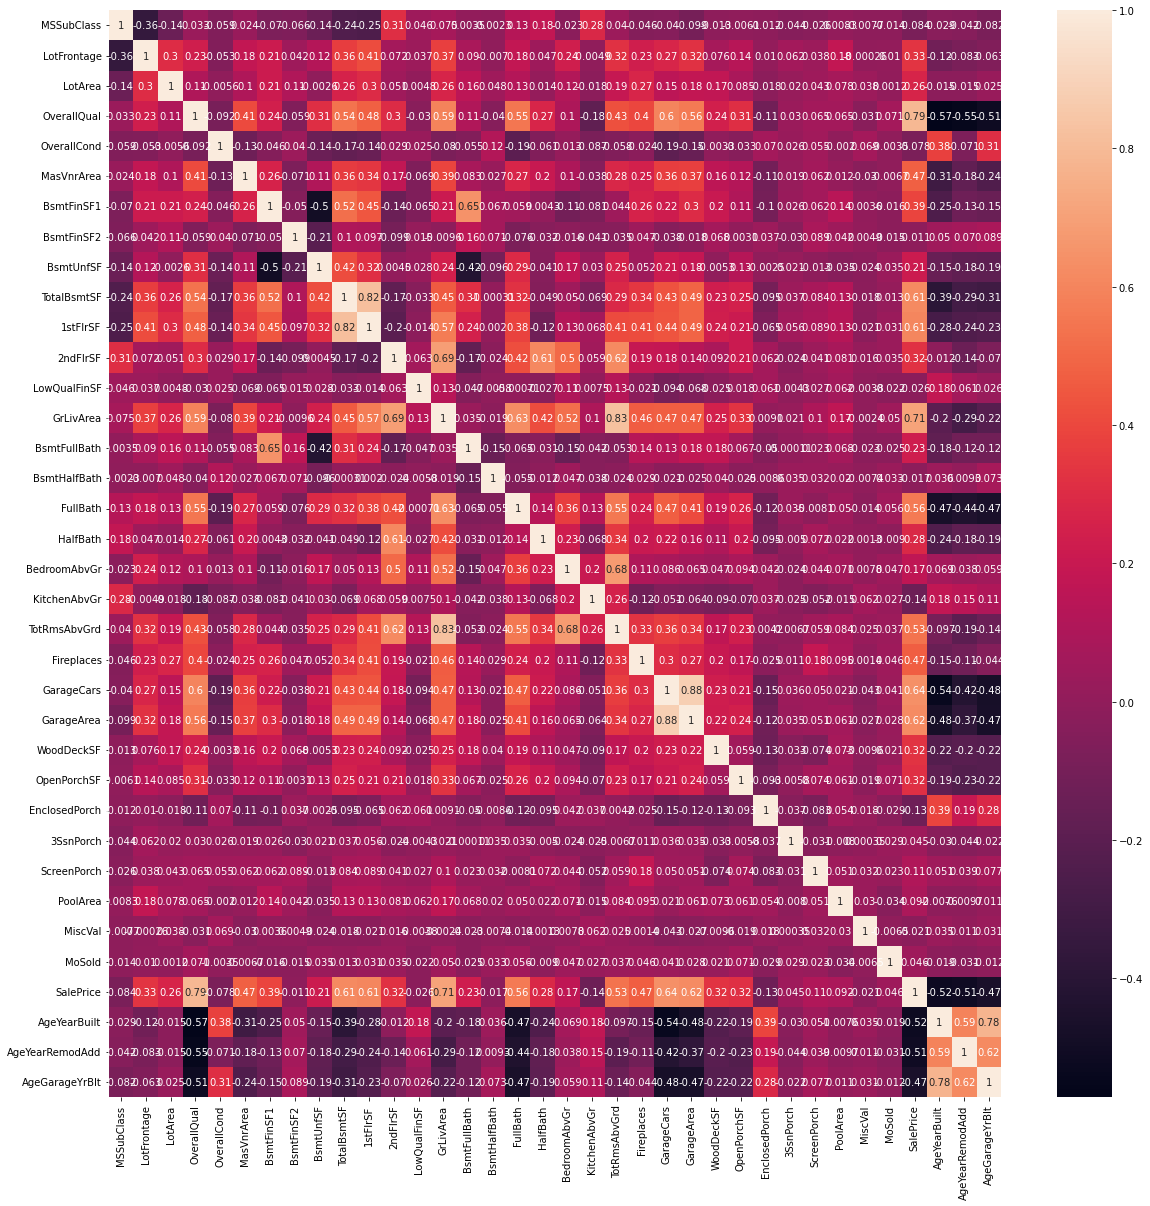

In [19]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[numerical_features].corr(), annot=True)

As per the above Heatmap for the Numerical Features Correlation, there are no numerical Features having more than 0.95 Correlation to drop them.

## Prepare train Data

In [20]:
# get numerical data
n_data = data[numerical_features]

# apply min max scaler on numerical data
scaler = MinMaxScaler()
n_data = scaler.fit_transform(n_data)
n_data = pd.DataFrame(n_data, columns=numerical_features)

In [21]:
# get categorical data
c_data = data[categorical_features]
c_data = pd.get_dummies(c_data, columns=categorical_features, drop_first=True)

# drop index for categorical data
c_data.reset_index(drop=True, inplace=True)

In [22]:
# concatinate numerical and categorical data
X = pd.concat([n_data, c_data], axis=1)

In [23]:
# set target feature
y = X.pop('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [24]:
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [25]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     50.09
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:47:23   Log-Likelihood:                 2208.6
No. Observations:                1021   AIC:                            -3969.
Df Residuals:                     797   BIC:                            -2865.
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.9036      0.102     -8.879      0.000      -1.103      -0.704
MSSubClass                0.0223      0.030      0.735      0.463      -0.037       0.082
LotFrontage               0.0201      0.021      0.944      0.346      -0.022       0.062
LotArea                   0.1845      0.044      4.221      0.000       0.099       0.270
OverallQual               0.0902      0.016      5.755      0.000       0.059       0.121
OverallCond               0.0581      0.012      4.838      0.000       0.035       0.082
MasVnrArea                0.0382      0.017      2.244      0.025       0.005       0.072
BsmtFinSF1                0.1409      0.025      5.689      0.000       0.092       0.189
BsmtFinSF2                0.0191      0.021      0.915      0.360      -0.022       0.060
BsmtUnfSF                 0.0015      0.011      0.146      0.884      -0.019       0.022
TotalBsmtSF               0.1353      0.025      5.356      0.000       0.086       0.185
1stFlrSF                  0.1304      0.025      5.214      0.000       0.081       0.179
2ndFlrSF                  0.1120      0.018      6.277      0.000       0.077       0.147
LowQualFinSF             -0.0153      0.021     -0.713      0.476      -0.057       0.027
GrLivArea                 0.1490      0.020      7.598      0.000       0.110       0.187
BsmtFullBath              0.0111      0.010      1.087      0.277      -0.009       0.031
BsmtHalfBath             -0.0042      0.010     -0.410      0.682      -0.024       0.016
FullBath                  0.0179      0.011      1.596      0.111      -0.004       0.040
HalfBath                  0.0031      0.007      0.425      0.671      -0.011       0.017
BedroomAbvGr             -0.0335      0.019     -1.737      0.083      -0.071       0.004
KitchenAbvGr             -0.0520      0.032     -1.602      0.110      -0.116       0.012
TotRmsAbvGrd              0.0253      0.020      1.274      0.203      -0.014       0.064
Fireplaces                0.0141      0.007      2.075      0.038       0.001       0.028
GarageCars                0.0042      0.015      0.279      0.780      -0.025       0.034
GarageArea                0.0536      0.019      2.834      0.005       0.016       0.091
WoodDeckSF                0.0144      0.008      1.732      0.084      -0.002       0.031
OpenPorchSF              -0.0009      0.010     -0.086      0.931      -0.020       0.019
EnclosedPorch            -0.0003      0.012     -0.022      0.982      -0.024       0.023
3SsnPorch                 0.0344      0.017      2.005      0.045       0.001       0.068
ScreenPorch               0.0211      0.010      2.080      0.038       0.001       0.041
PoolArea                  0.1094      0.027      3.990      0.000       0.056       0.163
MiscVal                

In [26]:
y_pred = ols_model.predict(sm.add_constant(X_test))

In [27]:
r2_score(y_test, y_pred)

0.728572796459839

As per above observations, we got R-squared as 0.934 for Training Data, but we got R-squared 0.728 for Test Data. So we can clearly observe High Variance for the model. We will solve this problem with Regularization below.

## Applying Lasso and Ridge Regression

### Lasso Regression:

In [28]:
lasso = Lasso()
parameters = {'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 100]}
model_lasso = GridSearchCV(estimator=lasso, param_grid=parameters, cv=5)
model_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   100]})

In [29]:
lasso_cv = pd.DataFrame(model_lasso.cv_results_)
lasso_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.223465,0.030176,0.004108,0.000954,0.00001,{'alpha': 1e-05},0.863576,0.407000,0.774399,0.888437,0.357946,0.658272,0.228886,5
1,0.070168,0.016598,0.003593,0.000096,0.00005,{'alpha': 5e-05},0.834985,0.477989,0.826152,0.857386,0.845327,0.768368,0.145564,4
2,0.029113,0.007071,0.003344,0.000275,0.0001,{'alpha': 0.0001},0.838571,0.518677,0.848585,0.855998,0.877765,0.787919,0.135236,2
3,0.015220,0.005508,0.003389,0.000215,0.0005,{'alpha': 0.0005},0.818887,0.625524,0.851916,0.851062,0.865006,0.802479,0.089774,1
4,0.014686,0.004134,0.003473,0.000034,0.001,{'alpha': 0.001},0.777702,0.650931,0.820835,0.812295,0.822548,0.776862,0.065017,3
5,0.009892,0.000694,0.003377,0.000202,0.005,{'alpha': 0.005},0.544329,0.543638,0.568758,0.566529,0.635185,0.571688,0.033473,6
6,0.008212,0.000698,0.003587,0.000746,0.01,{'alpha': 0.01},0.357281,0.351803,0.385992,0.381460,0.449031,0.385114,0.034594,7
7,0.006835,0.000389,0.003289,0.000197,0.05,{'alpha': 0.05},-0.010001,-0.000053,-0.006015,-0.002530,-0.000190,-0.003758,0.003796,8
8,0.006628,0.000531,0.003266,0.000261,0.1,{'alpha': 0.1},-0.010001,-0.000053,-0.006015,-0.002530,-0.000190,-0.003758,0.003796,8
9,0.006762,0.000395,0.003340,0.000200,0.5,{'alpha': 0.5},-0.010001,-0.000053,-0.006015,-0.002530,-0.000190,-0.003758,0.003796,8


Lets plot the how mean_test_score varies with alpha value. As we have wide range of power for Alpha value, we will use log10 for Alpha on scale

Text(0, 0.5, 'Mean test score')

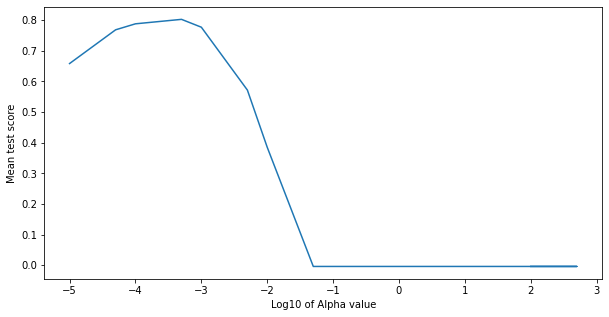

In [30]:
# plot log10 alpha value vs mean test score and mean train score
plt.figure(figsize=(10,5))
plt.plot(lasso_cv['param_alpha'].apply(math.log10), lasso_cv['mean_test_score'])
plt.xlabel('Log10 of Alpha value')
plt.ylabel('Mean test score')

In [31]:
# best estimator score on test data
model_lasso.best_estimator_.score(X_test, y_test)

0.8539260727487552

In [32]:
# best estimator score on whole train data
model_lasso.best_estimator_.score(X_train, y_train)

0.8562175709600879

In [33]:
# best alpha value
model_lasso.best_estimator_.alpha

0.0005

In [34]:
# best estimator coefficients
print(model_lasso.best_estimator_.coef_)
print("total coefficients for the model :", len(model_lasso.best_estimator_.coef_))

[-4.29952599e-02 -0.00000000e+00  0.00000000e+00  1.53882523e-01
  5.87190478e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.82571213e-02
  0.00000000e+00  1.70265608e-01  2.05774723e-02 -0.00000000e+00
  2.44244525e-02  2.97698693e-03  0.00000000e+00 -0.00000000e+00
  4.44071031e-02  3.60231251e-02  6.86841878e-02  0.00000000e+00
  8.93653441e-03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  6.86338835e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.03900017e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.01397156e-02  0.00000000e+00
  4.79255021e-03 -0.00000000e+00 -7.09208379e-04  8.75617840e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.29200629e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.12250511e-02 -1.03400635e-02
 -0.00000000e+00 -0.00000

#### As per above, we can observe that Apha with 0.0005 is the best model. Besides we can observe that we have used 231 Features. So we will reduce the number of features based on Weightage of Coefficients.

In [35]:
# coefficients data frame for lasso cross validation
coeff_df = pd.DataFrame({'feature_name':X_train.columns, 'coeff':model_lasso.best_estimator_.coef_})
coeff_df['absolute_coeff'] = abs(coeff_df['coeff'])
high_weighed_features = coeff_df.sort_values(by='absolute_coeff', ascending=False).head(15)['feature_name'].tolist()

In [36]:
high_weighed_features

['GrLivArea',
 'OverallQual',
 'GarageCars',
 'Neighborhood_NoRidge',
 'TotRmsAbvGrd',
 'MSSubClass',
 'Neighborhood_StoneBr',
 'Fireplaces',
 'Neighborhood_NridgHt',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtExposure_Gd',
 'KitchenQual_TA',
 'FullBath',
 'Exterior1st_BrkFace']

In [37]:
# lets evaluate the model with considering high weighed 15 features
lasso = Lasso()
parameters = {'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 100]}
model_lasso_15 = GridSearchCV(estimator=lasso, param_grid=parameters, cv=5)
model_lasso_15.fit(X_train[high_weighed_features], y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   100]})

In [38]:
# get the alpha for best estimator with 15 features
model_lasso_15.best_estimator_

Lasso(alpha=0.0001)

In [39]:
# evaluate the model on test data
model_lasso_15.best_estimator_.score(X_test[high_weighed_features], y_test)

0.8314978501029832

In [40]:
# evaluate the model on whole train data
model_lasso_15.best_estimator_.score(X_train[high_weighed_features], y_train)

0.8151446581811965

In [41]:
# get the best estimator coefficients
model_lasso_15.best_estimator_.coef_

array([ 0.23402125,  0.21374648,  0.08249644,  0.07404067,  0.02061263,
       -0.05636106,  0.08043815,  0.0417859 ,  0.05494516, -0.03246052,
       -0.04062823,  0.04506968, -0.01820325,  0.0302387 ,  0.02722626])

As per the above, we can get the best model with 15 features ['GrLivArea','OverallQual', 'GarageCars', 'Neighborhood_NoRidge', 'TotRmsAbvGrd', 'MSSubClass', 'Neighborhood_StoneBr', 'Fireplaces', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_TA', 'FullBath', 'Exterior1st_BrkFace'] and Alpha 0.0001 having test score of 0.83 and whole train score as 0.81.

### Ridge Regression:

In [42]:
ridge = Ridge()
parameters = {'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 
                        0.1, 0.5, 1, 5, 10, 50, 100, 500, 100]}
model_ridge = GridSearchCV(estimator=ridge, param_grid=parameters, cv=5)
model_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   100]})

In [43]:
ridge_cv = pd.DataFrame(model_ridge.cv_results_)
ridge_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007595,0.000820,0.002900,0.000524,0.00001,{'alpha': 1e-05},0.868971,0.385321,0.739745,0.857092,0.032938,0.576813,0.323397,16
1,0.006152,0.000235,0.002377,0.000115,0.00005,{'alpha': 5e-05},0.868926,0.385340,0.739857,0.857141,0.034587,0.577170,0.322852,15
2,0.006334,0.000103,0.002718,0.000370,0.0001,{'alpha': 0.0001},0.868870,0.385364,0.739997,0.857201,0.036641,0.577615,0.322173,14
3,0.006762,0.001071,0.002610,0.000470,0.0005,{'alpha': 0.0005},0.868425,0.385556,0.741102,0.857675,0.052806,0.581113,0.316854,13
4,0.006161,0.000154,0.002856,0.000462,0.001,{'alpha': 0.001},0.867874,0.385794,0.742441,0.858239,0.072357,0.585341,0.310468,12
5,0.006205,0.000155,0.002530,0.000248,0.005,{'alpha': 0.005},0.863713,0.387590,0.751724,0.861804,0.206258,0.614218,0.268420,11
6,0.006006,0.000067,0.002290,0.000010,0.01,{'alpha': 0.01},0.859102,0.389632,0.760594,0.864491,0.330998,0.640963,0.232855,10
7,0.006885,0.000597,0.003102,0.000839,0.05,{'alpha': 0.05},0.837807,0.402258,0.790599,0.863431,0.701766,0.719172,0.167764,9
8,0.007879,0.001110,0.003397,0.000470,0.1,{'alpha': 0.1},0.827754,0.414675,0.803453,0.855634,0.798541,0.740011,0.163928,6
9,0.012754,0.001609,0.005199,0.000498,0.5,{'alpha': 0.5},0.819735,0.481184,0.836922,0.841270,0.859575,0.767737,0.143836,5


Lets plot the how mean_test_score varies with alpha value. As we have wide range of power for Alpha value, we will use log10 for Alpha on scale.

Text(0, 0.5, 'Mean test score')

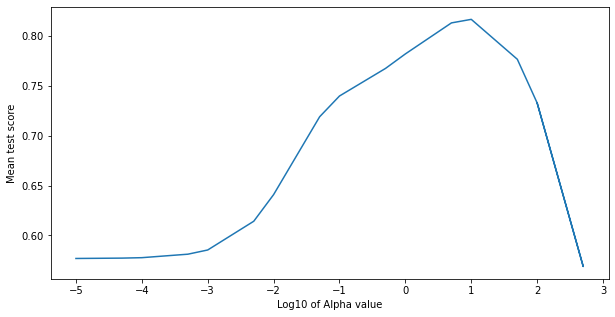

In [44]:
# plot log10 alpha value vs mean test score and mean train score
plt.figure(figsize=(10,5))
plt.plot(ridge_cv['param_alpha'].apply(math.log10), ridge_cv['mean_test_score'])
plt.xlabel('Log10 of Alpha value')
plt.ylabel('Mean test score')

In [45]:
# best estimator score on test data
model_ridge.best_estimator_.score(X_test, y_test)

0.8612711162545995

In [46]:
# best estimator score on whole train data
model_ridge.best_estimator_.score(X_train, y_train)

0.8812081869065126

In [47]:
# best alpha value
model_ridge.best_estimator_.alpha

10

In [48]:
# best estimator coefficients
print(model_ridge.best_estimator_.coef_)
print("total coefficients for the model :", len(model_ridge.best_estimator_.coef_))

[-2.61822825e-02 -6.85014971e-04  1.75312653e-02  6.99647081e-02
  2.45327580e-02  1.77126035e-02  1.18805994e-02  5.00418131e-03
  1.30595805e-02  1.71747048e-02  3.44655640e-02  5.53247740e-02
  9.07707763e-03  5.07985445e-02  2.33670331e-02 -3.56889920e-03
  4.03206636e-02  1.63814426e-02  1.20267548e-02 -8.17934606e-03
  4.92134266e-02  3.48487374e-02  4.48982282e-02  2.79155768e-02
  1.90890987e-02  5.54941792e-05  2.94636442e-03  1.12698976e-02
  2.22527113e-02  1.15397119e-02 -1.01489110e-03  7.73632880e-04
 -7.83829092e-03 -1.76771549e-02 -1.83954856e-03  7.80087053e-03
  1.21173676e-04  6.37674110e-03 -2.93902783e-03  4.00136602e-03
  1.23078431e-02 -1.32772897e-02 -1.23040606e-03  2.64735186e-02
  7.15159169e-03  1.39316298e-02 -4.43403787e-03  1.57258667e-02
 -1.09650240e-02 -5.35858920e-03 -1.57341134e-03  7.10033282e-03
  9.23959263e-03 -3.42202289e-04  2.71426279e-03  1.77748601e-03
 -7.30418181e-04 -1.10653627e-02  1.92107986e-02 -2.47104237e-02
 -1.49146956e-02 -1.06161

#### As per above, we can observe that Apha with 10 is the best model. Besides we can observe that we have used 231 Features. So we will reduce the number of features based on Weightage of Coefficients.

In [49]:
# coefficients data frame for lasso cross validation
coeff_df_ridge = pd.DataFrame({'feature_name':X_train.columns, 'coeff':model_ridge.best_estimator_.coef_})
coeff_df_ridge['absolute_coeff'] = abs(coeff_df_ridge['coeff'])
high_weighed_features_ridge = coeff_df_ridge.sort_values(by='absolute_coeff', ascending=False).head(15)['feature_name'].tolist()

In [50]:
high_weighed_features_ridge

['OverallQual',
 '2ndFlrSF',
 'GrLivArea',
 'Neighborhood_NoRidge',
 'TotRmsAbvGrd',
 'GarageCars',
 'Neighborhood_StoneBr',
 'FullBath',
 'BsmtQual_TA',
 'BsmtQual_Gd',
 'KitchenQual_TA',
 'Fireplaces',
 '1stFlrSF',
 'Neighborhood_NridgHt',
 'KitchenQual_Gd']

In [51]:
# lets evaluate the model with considering high weighed 15 features
ridge = Ridge()
parameters = {'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                        0.1, 0.5, 1, 5, 10, 50, 100, 500, 100]}
model_ridge_15 = GridSearchCV(estimator=ridge, param_grid=parameters, cv=5)
model_ridge_15.fit(X_train[high_weighed_features_ridge], y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   100]})

In [52]:
# get the alpha for best estimator with 15 features
model_ridge_15.best_estimator_

Ridge(alpha=5)

In [53]:
# evaluate the model on test data
model_ridge_15.best_estimator_.score(X_test[high_weighed_features_ridge], y_test)

0.8126257649730795

In [54]:
# evaluate the model on whole train data
model_ridge_15.best_estimator_.score(X_train[high_weighed_features_ridge], y_train)

0.7842543513534918

In [55]:
# get the best estimator coefficients
model_ridge_15.best_estimator_.coef_

array([ 0.16334572,  0.01338345,  0.09056445,  0.07661302,  0.05031903,
        0.09802907,  0.05832435,  0.03258083, -0.04642252, -0.03373809,
       -0.04264869,  0.06376181,  0.10414225,  0.04289232, -0.02186585])

As per the above, we can get the best model with 15 features ['OverallQual', '2ndFlrSF', 'GrLivArea', 'Neighborhood_NoRidge', 'TotRmsAbvGrd', 'GarageCars', 'Neighborhood_StoneBr', 'FullBath', 'BsmtQual_TA', 'BsmtQual_Gd', 'KitchenQual_TA', 'Fireplaces', '1stFlrSF', 'Neighborhood_NridgHt', 'KitchenQual_Gd'] and Alpha 5 having test score of 0.81 and whole train score as 0.78.

## Summary:
- We have built the model with stats model where we observed High Variance.<br/>
<strong>train score: 0.93, test score: 0.73</strong><br/><br/>
- Then we have built the model with Lasso Regression where we got optimal Alpha as 0.0005 with 231 Features.<br/>
<strong>train score: 0.85, test score: 0.85</strong><br/> <br/>
- Then we have built optimized Lasso Regression model with 15 Features where we got optimal Alpha as 0.0001.<br/>
<strong>train score: 0.81, test score: 0.83</strong><br/><br/>
- We have tried Ridge regression where we got optimized Alpha as 10 with 231 Features.<br/>
<strong>train score: 0.88, test score: 0.86</strong><br/><br/>
- Then we have built optimized Ridge regression model with 15 Features where we got optimal Alpha as 5.<br/>
<strong>train score: 0.78, test score: 0.81</strong>